/var/folders/g7/n540bt_13md_2p9k1jl4npg00000gn/T/ipykernel_98698/3666635200.py:29: RuntimeWarning: invalid value encountered in divide
  dotN2p= (1-a+a/(1+np.exp(-3*(N1p-1.5))))*(1-b+b/(1+np.exp(-10*((N1p/(N1p+N2p))-0.5))))*h*N2p*(1-(N1p+N2p)/K)


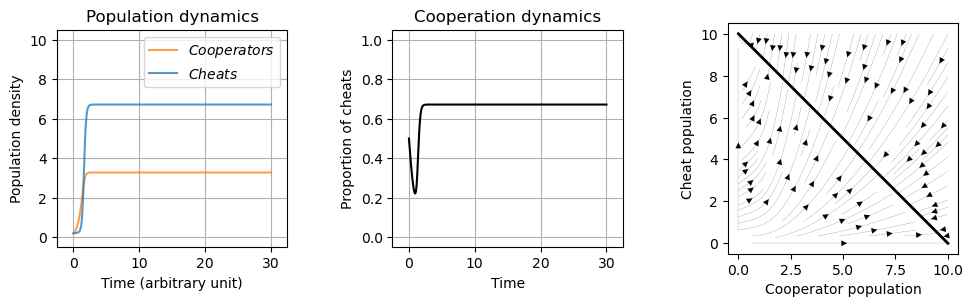

In [9]:
## Main model, extended from Lotka-Volterra competition model
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
## Parameters and initial conditions
r= 2.0
h= 4.0
K= 10.0
N_initial= [0.2, 0.2]
a= 1.
b= 0.
## Defining the ordinary differential equation system (ODEs)
def derivative(N,t,r,h,K,a,b):
  N1= N[0]
  N2= N[1]
  dotN1= r*N1*(1-(N1+N2)/K)
  dotN2= (1-a+a/(1+math.exp(-3*(N1-1.5))))*(1-b+b/(1+math.exp(-10*((N1/(N1+N2))-0.5))))*h*r*N2*(1-(N1+N2)/K)
  return np.array([dotN1, dotN2])
## Solving the ODEs
Num_points= 1000
T_final= 30.
t= np.linspace(0.,T_final,Num_points)
solved= integrate.odeint(derivative, N_initial, t, args= (r,h,K,a,b))
N1, N2= solved.T
#
N1p,N2p = np.meshgrid(np.linspace(0,10,20),np.linspace(0,10,20))
dotN1p= r*N1p*(1-(N1p+N2p)/K)
dotN2p= (1-a+a/(1+np.exp(-3*(N1p-1.5))))*(1-b+b/(1+np.exp(-10*((N1p/(N1p+N2p))-0.5))))*h*N2p*(1-(N1p+N2p)/K)
#
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
#
ax1.plot(t, N1, 'tab:orange', label = r'$Cooperators$', alpha=0.75)
ax1.plot(t, N2, 'tab:blue', label = r'$Cheats$', alpha=0.75)
ax1.set_xlim(-2.5, 32.5)
ax1.set_ylim(-0.5, 10.5)
ax1.set_title('Population dynamics')
ax1.set_xlabel('Time (arbitrary unit)')
ax1.set_ylabel('Population density')
ax1.set(aspect=3)
ax1.legend()
ax1.grid()
#
ax2.plot(t, N2/(N1+N2), 'black')
ax2.set_xlim(-2.5, 32.5)
ax2.set_ylim(-0.05, 1.05)
ax2.set_title('Cooperation dynamics')
ax2.set_xlabel('Time')
ax2.set_ylabel('Proportion of cheats')
ax2.set(aspect= 30)
ax2.grid()

# ax3.quiver(N1p, N2p, dotN1p, dotN2p)
ax3.streamplot(N1p, N2p, dotN1p, dotN2p, density= 1, linewidth= 0.1, color='black')
ax3.plot([0,10],[10,0],'k-',lw=2)
ax3.set_xlim(-0.5, 10.5)
ax3.set_ylim(-0.5, 10.5)
ax3.set_xlabel('Cooperator population')
ax3.set_ylabel('Cheat population')
ax3.set(aspect=1)
#
fig.tight_layout(pad=0.5)
fig.set_size_inches(10,3)
fig.savefig('output.pdf')